In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
df = pd.read_csv('./fcc-forum-pageviews.csv', index_col='date', parse_dates=True)
df = df[
	(df['value'] >= df['value'].quantile(0.025))
	& (df['value'] <= df['value'].quantile(0.975))
]

(array([16983., 17167., 17348., 17532., 17713., 17897., 18078., 18262.]),
 [Text(16983.0, 0, '2016-07'),
  Text(17167.0, 0, '2017-01'),
  Text(17348.0, 0, '2017-07'),
  Text(17532.0, 0, '2018-01'),
  Text(17713.0, 0, '2018-07'),
  Text(17897.0, 0, '2019-01'),
  Text(18078.0, 0, '2019-07'),
  Text(18262.0, 0, '2020-01')])

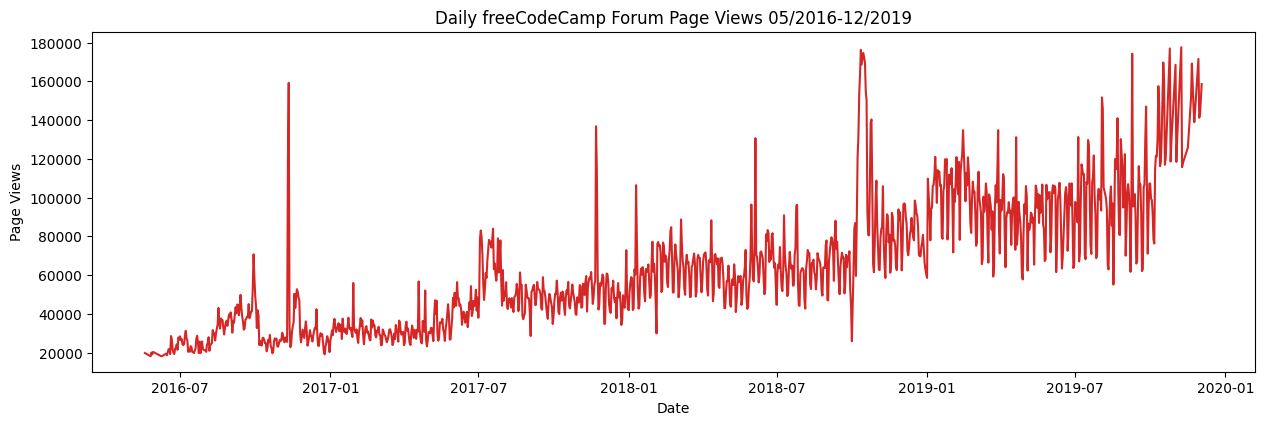

In [5]:
min_date = pd.to_datetime(df.index.min()).strftime('%m/%Y')
max_date = pd.to_datetime(df.index.max()).strftime('%m/%Y')
title = f'Daily freeCodeCamp Forum Page Views {min_date}-{max_date}'
figure = df.plot(
	kind='line',
	y='value',
	title=title,
	xlabel='Date',
	ylabel='Page Views',
	legend=False,
	rot=0,
	figsize=(15, 5),
	style={'value': '#d62727'},
)
plt.xticks(horizontalalignment='center')

<Axes: xlabel='year'>

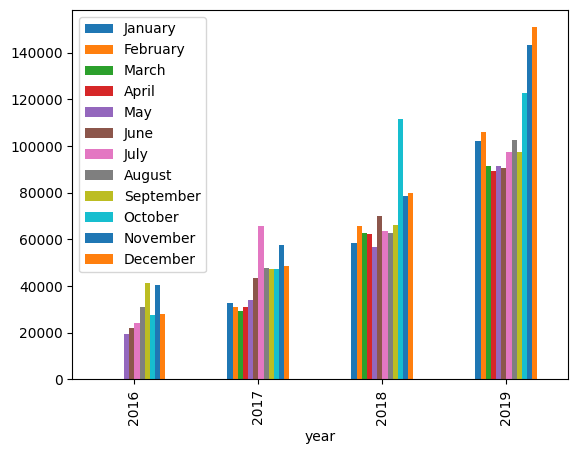

In [77]:
df_bar = df
df_bar['month'] = df.index.strftime('%m')
df_bar['year'] = df.index.strftime('%Y')

df_bar = df_bar.groupby(['year', 'month']).mean().unstack()
df_bar.columns = [
		'January',
		'February',
		'March',
		'April',
		'May',
		'June',
		'July',
		'August',
		'September',
		'October',
		'November',
		'December'
	]
df_bar.plot(kind='bar')

# fig, ax = plt.subplots(figsize=(6.75, 6.75))

# graph = sns.barplot(
# 	data=df_bar,
# 	# kind='bar',
# 	x='year',
# 	y='value',
# 	hue='month',
# 	hue_order=[
# 		'January',
# 		'February',
# 		'March',
# 		'April',
# 		'May',
# 		'June',
# 		'July',
# 		'August',
# 		'September',
# 		'October',
# 		'November',
# 		'December'
# 	],
# 	palette='tab10',
# 	width=0.5,
# 	# height=6,
# 	# aspect=1,
# 	ax=ax
# )
# ax.set_xlabel('Years')
# ax.set_ylabel('Average Page Views')
# ax.legend(title='Months', loc='upper left')
# plt.xticks(rotation=90)


Text(0, 0.5, 'Page Views')

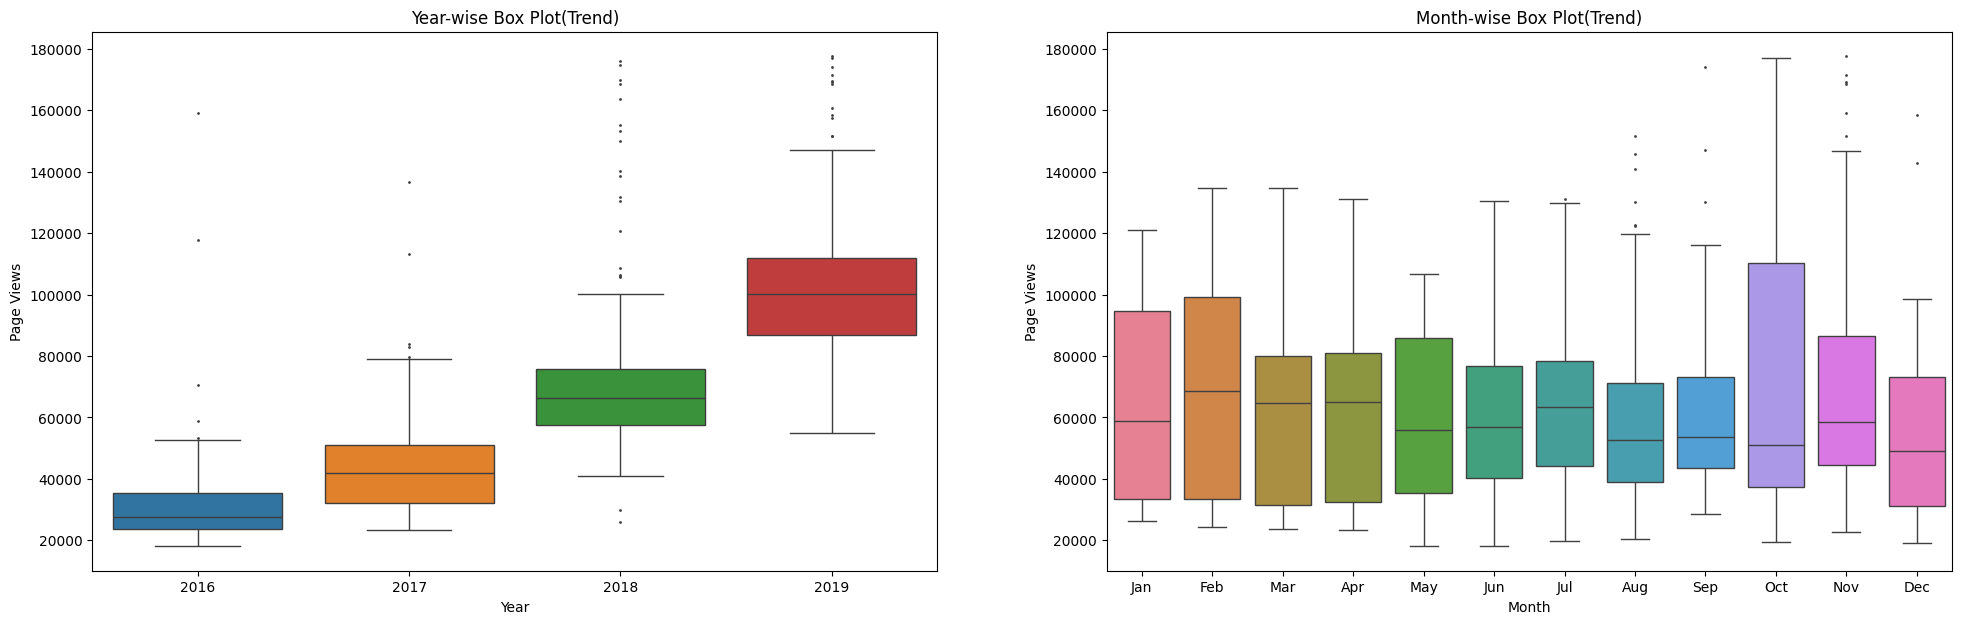

In [69]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
# print(df_box)

fig, ax = plt.subplots(1, 2, figsize=(24, 7))
sns.boxplot(
	data=df_box,
	ax=ax[0],
	x='year',
	y='value',
	palette='tab10',
	hue='year',
	legend=False,
	fliersize=1
)
ax[0].set_title('Year-wise Box Plot(Trend)')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Page Views')

sns.boxplot(
	data=df_box,
	ax=ax[1],
	x='month',
	y='value',
	hue='month',
	legend=False,
	order=[
		'Jan',
		'Feb',
		'Mar',
		'Apr',
		'May',
		'Jun',
		'Jul',
		'Aug',
		'Sep',
		'Oct',
		'Nov',
		'Dec'
	],
	hue_order=[
		'Jan',
		'Feb',
		'Mar',
		'Apr',
		'May',
		'Jun',
		'Jul',
		'Aug',
		'Sep',
		'Oct',
		'Nov',
		'Dec'
	],
	fliersize=1
)
ax[1].set_title('Month-wise Box Plot(Trend)')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Page Views')